### CS4423 - Networks
Angela Carnevale<br/>
School of Mathematical and Statistical Sciences<br/>
NUI Galway

# Week 1, Lecture 2: 
# Graphs and `networkx`

## Graphs


A **graph** can serve as a mathematical model of a network.


* We will use the `networkx` package to work with examples of graphs and networks.

* This notebook gives and introduction into graph theory, along with some basic, useful
  `networkx` commands.

* From now on, we load some `python` packages at the start of each
  notebook, so we have them available later on.

In [4]:
import networkx as nx

##  The Internet, for Example

**Example.**  The internet (more precisely, [ARPANET](https://en.wikipedia.org/wiki/ARPANET)) in December 1970.  Nodes are computers,
connected by a link if they can directly communicate with each other.
At the time, only 13 computers participated in that network.

![the internet in december 1970](https://d1vq4hxutb7n2b.cloudfront.net/system/files/53b5c1/66342b8248f70002ea/h_1536/f7dec1970.jpg)


As far as the network structure is concerned, the following list of **adjacencies** contains all the information.

In [5]:
!cat data/arpa.adj

UCSB SRI UCLA
SRI UCLA STAN UTAH
UCLA STAN RAND
UTAH SDC MIT
RAND SDC BBN
MIT BBN LINC
BBN HARV
LINC CASE
HARV CARN
CASE CARN


The following **diagram**, built from the adjacencies in the list,
contains the same information (without the distracting details of the
US geography).

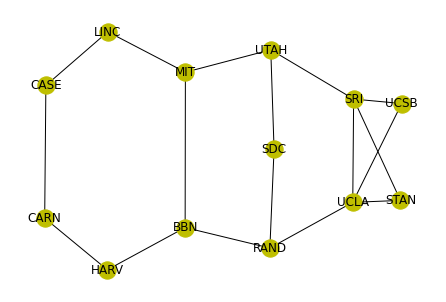

In [6]:
H = nx.read_adjlist("data/arpa.adj")
opts = { "with_labels": True, "node_color": 'y' }
nx.draw(H, **opts)

## Simple Graphs


**Definition.** A (simple) **graph**
is a pair $G = (X, E)$, consisting of a (finite) set $X$ of
    objects, called **nodes** or **vertices** or **points**,
and a subset $E \subseteq \binom{X}{2}$
    of **links** or **edges**.

Usually, $n$ is used to denote the number of vertices of a graph,
$n = |X|$,
and $m$ for the number of edges, $m = |E|$.

$n = |X|$ is called the **order** of the graph $G$, and $m = |E|$ is called the  **size** of $G$.


Here, $\binom{X}{2}$, pronounced as "$X$ choose 2",
is the set of all $2$-element subsets of $X$.

The notation is motivated by the fact that if $X$ has $n$ elements then
$\binom{X}{2}$ has $\binom{n}{2} = \frac12 n(n-1)$ elements:
$$\left|\binom{X}{2}\right| = \binom{|X|}{2}.$$
Obviously, $m \leq \binom{n}{2}$.

**Example.**

$X = \{ A, B, C, D \}$ and $E = \{ AB, BC, BD, CD \}$ 
(where $AB$ is short for $\{ A, B \}$).

Then $G=(X,E)$ is a graph of order $4$ and size $4$.

##  Simple Graphs in `networkx`

* In `networkx`, we can construct this graph with the `Graph`
constructor function, which takes the node and edge sets $X$ and $E$ in a variety of formats.  
* Here, as we've seen yesterday, we use $2$-letter strings for the edges (which implicitly gives the nodes too): 

In [7]:
G = nx.Graph(["AB", "BC", "BD", "CD"])
G 

* The `python` object `G` representing the graph $G$ has lots of useful attributes.  Firstly, it has `nodes` and `edges`.

In [8]:
G.nodes

NodeView(('A', 'B', 'C', 'D'))

In [9]:
list(G.nodes)

['A', 'B', 'C', 'D']

In [10]:
G.edges

EdgeView([('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D')])

In [11]:
list(G.edges)

[('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D')]

* A **loop** over a graph `G` will effectively loop over `G`'s nodes.

In [12]:
for node in G:
    print(node)

A
B
C
D


* We can count the nodes, and the edges.

In [13]:
G.number_of_nodes()

4

In [14]:
G.order()

4

In [15]:
G.number_of_edges()

4

In [16]:
G.size()

4

* And a drawing of the graph can be produced.

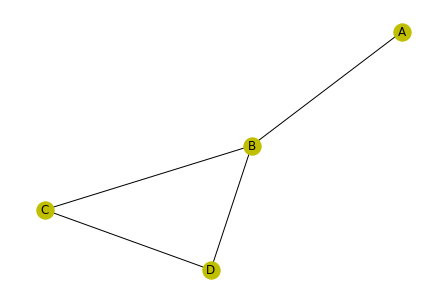

In [17]:
nx.draw(G, **opts)

* The example also illustrates a typical way how diagrams of graphs are drawn:
nodes are represented by small circles, and edges by lines connecting the nodes.

* A graph `G` can be modified, by adding nodes one at a time ...

In [18]:
G.add_node(1)
list(G.nodes)

['A', 'B', 'C', 'D', 1]

* ... or many nodes at once ...

In [19]:
G.add_nodes_from([2, 3, 5])
list(G.nodes)

['A', 'B', 'C', 'D', 1, 2, 3, 5]

* ... or even as nodes of another graph `H`

In [20]:
G.add_nodes_from(H)
list(G.nodes)

['A',
 'B',
 'C',
 'D',
 1,
 2,
 3,
 5,
 'UCSB',
 'SRI',
 'UCLA',
 'STAN',
 'UTAH',
 'RAND',
 'SDC',
 'MIT',
 'BBN',
 'LINC',
 'HARV',
 'CASE',
 'CARN']

In [21]:
G.order(), G.size()

(21, 4)

* Adding edges works in a similar fashion

In [22]:
G.add_edge(1,2)
list(G.edges)

[('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D'), (1, 2)]

In [23]:
edge = (2,3)
G.add_edge(*edge)
list(G.edges)

[('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D'), (1, 2), (2, 3)]

In [24]:
G.add_edges_from([(1,5), (2,5), (3,5)])
list(G.edges)

[('A', 'B'),
 ('B', 'C'),
 ('B', 'D'),
 ('C', 'D'),
 (1, 2),
 (1, 5),
 (2, 3),
 (2, 5),
 (3, 5)]

In [25]:
G.add_edges_from(H.edges)
list(G.edges)

[('A', 'B'),
 ('B', 'C'),
 ('B', 'D'),
 ('C', 'D'),
 (1, 2),
 (1, 5),
 (2, 3),
 (2, 5),
 (3, 5),
 ('UCSB', 'SRI'),
 ('UCSB', 'UCLA'),
 ('SRI', 'UCLA'),
 ('SRI', 'STAN'),
 ('SRI', 'UTAH'),
 ('UCLA', 'STAN'),
 ('UCLA', 'RAND'),
 ('UTAH', 'SDC'),
 ('UTAH', 'MIT'),
 ('RAND', 'SDC'),
 ('RAND', 'BBN'),
 ('MIT', 'BBN'),
 ('MIT', 'LINC'),
 ('BBN', 'HARV'),
 ('LINC', 'CASE'),
 ('HARV', 'CARN'),
 ('CASE', 'CARN')]

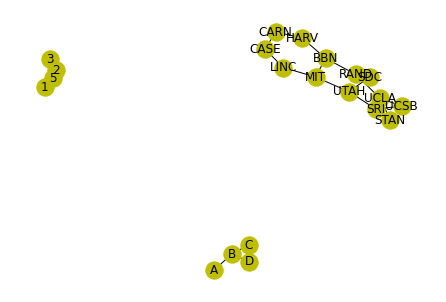

In [26]:
nx.draw(G, **opts)

In [27]:
G.order(), G.size()

(21, 26)

* There are corresponding commands for removing nodes or edges from a graph `G`

In [28]:
G.remove_edge(3,5)
G.order(), G.size()

(21, 25)

In [29]:
G.remove_edges_from(H.edges())

G.order(), G.size()

(21, 8)

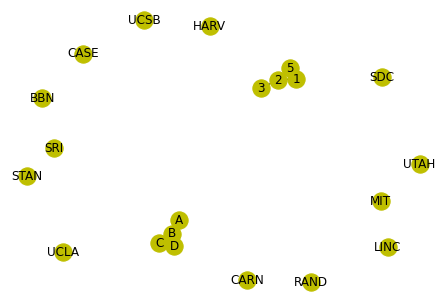

In [30]:
nx.draw(G, **opts)

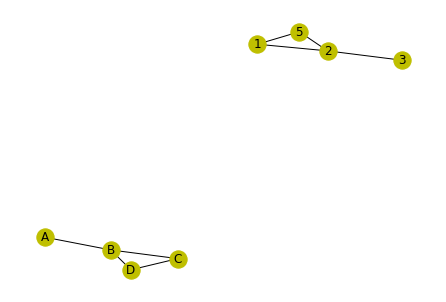

In [31]:
G.remove_nodes_from(H)
nx.draw(G, **opts)

* Removing a node will silently delete all edges it forms part of

In [32]:
G.remove_nodes_from([1, 2, 3, 5])
G.order(), G.size()

(4, 4)

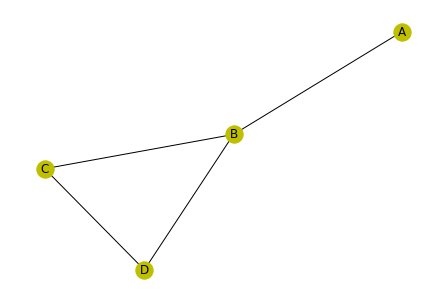

In [33]:
nx.draw(G, **opts)

* Each node has a list of **neighbors**, the nodes it is
  directly connected to by an edge of the graph.

In [34]:
list(G.neighbors('B'))

['A', 'C', 'D']

In [35]:
G['B']

AtlasView({'A': {}, 'C': {}, 'D': {}})

In [36]:
list(G['B'])

['A', 'C', 'D']

* The number of neighbors of a node $x$ is its **degree**

In [37]:
G.degree('B')

3

In [38]:
G.degree

DegreeView({'A': 1, 'B': 3, 'C': 2, 'D': 2})

In [39]:
list(G.degree)

[('A', 1), ('B', 3), ('C', 2), ('D', 2)]

## Examples

### Complete Graphs

The [**complete graph**](https://en.wikipedia.org/wiki/Complete_graph)
on a vertex set $X$ is the graph with edge set all of $\binom{X}{2}$.

In [40]:
nodes = range(5)
nodes

range(0, 5)

In [41]:
list(nodes)

[0, 1, 2, 3, 4]

In [42]:
[(x, y) for x in nodes for y in nodes if x < y]

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

While it is somewhat straightforward to find all $2$-element
subsets of a given set $X$ with a short `python` program,
it is probably more convenient (and possibly efficient) to use a function from the
`itertools` package for this purpose.

In [43]:
from itertools import combinations
combinations(nodes, 2)

In [44]:
print(list(combinations(nodes, 2)))

[(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


In [45]:
K5 = nx.Graph(combinations(nodes, 2))

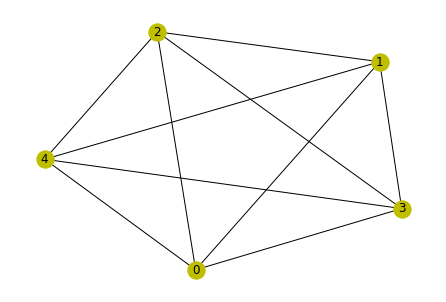

In [46]:
nx.draw(K5, **opts)

We can turn this procedure into a `python` function that
constructs the complete graph for an arbitrary vertex set $X$.

In [47]:
def complete_graph(nodes):
    return nx.Graph(combinations(nodes, 2))

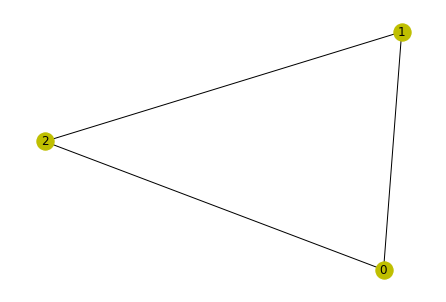

In [48]:
nx.draw(complete_graph(range(3)), **opts)

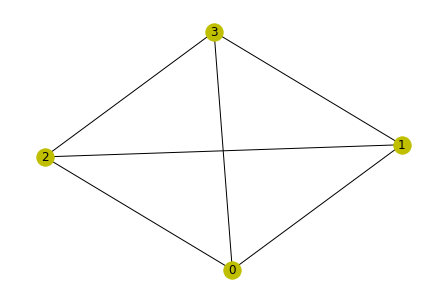

In [49]:
nx.draw(complete_graph(range(4)), **opts)

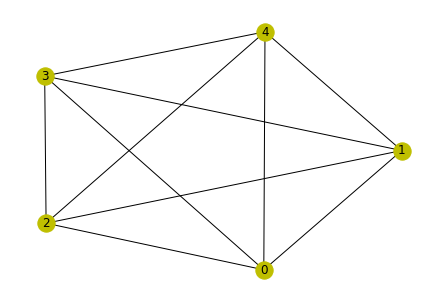

In [50]:
nx.draw(complete_graph(range(5)), **opts)

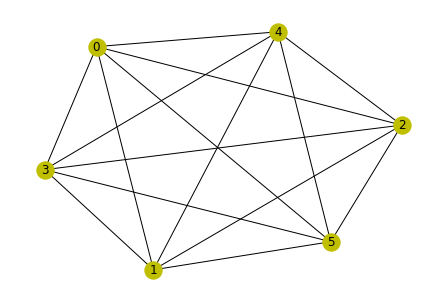

In [51]:
nx.draw(complete_graph(range(6)), **opts)

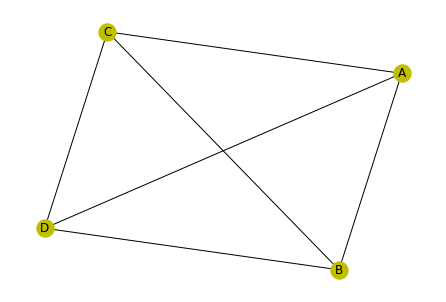

In [52]:
nx.draw(complete_graph("ABCD"), **opts)

In fact, `networkx` has its own implementation of complete graphs.

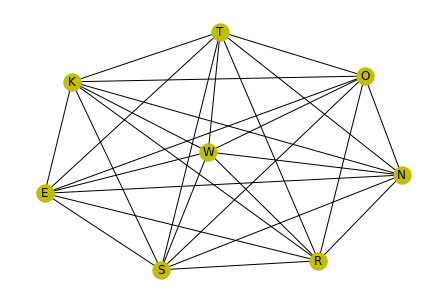

In [53]:
nx.draw(nx.complete_graph("NETWORKS"), **opts)

### Petersen Graph

The [Petersen Graph](https://en.wikipedia.org/wiki/Petersen_graph)
is a graph on $10$ vertices with $15$ edges.

It can be constructed 
as the complement of the line graph of the complete graph $K_5$,
i.e.,
as the graph with vertex set
$$X = \binom{\{0,1,2,3,4\}}{2}$$ (the edge set of $K_5$) and
with an edge between $x, y \in X$ whenever $x \cap y = \emptyset$.

In [ ]:
nx.draw(K5, **opts)

In [ ]:
lines = K5.edges
print(list(lines))

In [ ]:
print(list(combinations(lines, 2)))

In [ ]:
edges = [e for e in combinations(lines, 2) 
           if not set(e[0]) & set(e[1])]
len(edges)

In [ ]:
P = nx.Graph(edges)

In [ ]:
nx.draw(P, **opts)

Even though there is no parameter involved in this example,
it might be worth wrapping the construction up into a `python`
function.

In [ ]:
def petersen_graph():
    nodes = combinations(range(5), 2)
    G = nx.Graph()
    for e in combinations(nodes, 2):
        if not set(e[0]) & set(e[1]):
            G.add_edge(*e)
    return G

In [ ]:
nx.draw(petersen_graph(), **opts)

##  Code Corner

### `python`

* **list unpacking** operator `*e`: if `e` is a list, an
argument `*e` passes the elements of `e` as individual arguments
to a function call.

* **dictionary unpacking** operator `**opts`: `python` function calls take **positional** arguments and **keyword** arguments. The keyword arguments can be collected in a dictionary `opts` (with the keywords as keys).  This dictionary can then be passed into the function call in its "unwrapped" form `**opts`.

* **set intersection**: if `a` and `b` are sets then `a & b` represents the intersection of `a` and `b`.  In a boolean context, an empty set counts as `False`, and a non-empty set as `True`.

In [ ]:
a = set([1,2,3])
b = set([3,4,5])
a & b

In [ ]:
bool({}), bool({3})

* `list` [[doc]](https://docs.python.org/3/library/stdtypes.html#list) turns its argument into a `python` list (if possible).

In [ ]:
list("networks")

* **list comprehension** [[doc]](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) allows the construction of new list from old ones
without explicit `for` loops (or `if` statements).

In [ ]:
[(x, y) for x in range(4) for y in range(4) if x < y]

### `networkx`

* the `read_adjlist` command [[doc]](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.adjlist.read_adjlist.html#networkx.readwrite.adjlist.read_adjlist) constructs a graph from a text file in `adj` format.

* `Graph` constructor and applicable methods [[doc]](https://networkx.org/documentation/stable/reference/classes/graph.html): if `G` is  `Graph` object then
  * `G.nodes` returns the nodes of a graph `G` (as an iterator),
  * `G.edges` returns the edges of a graph `G` (as an iterator),
  * ...

* `complete_graph` [[doc]](https://networkx.org/documentation/stable//reference/generated/networkx.generators.classic.complete_graph.html)

### `itertools`

* `combinations` [[doc]](https://docs.python.org/3/library/itertools.html#itertools.combinations) returns the $k$-element combinations of a given list (as an iterator).

In [56]:
print(["".join(c) for c in combinations("networks", 2)])

['ne', 'nt', 'nw', 'no', 'nr', 'nk', 'ns', 'et', 'ew', 'eo', 'er', 'ek', 'es', 'tw', 'to', 'tr', 'tk', 'ts', 'wo', 'wr', 'wk', 'ws', 'or', 'ok', 'os', 'rk', 'rs', 'ks']


##  Exercises

1. Using list comprehension (and the `python` mod operator `%`)
   construct a multiplication table for integers mod $7$, i.e.,
   a $7 \times 7$ array with entry `a * b % 7` in row `a` and
   column `b`.
2. Find a way to use list comprehension for 
   listing all $2$-element subsets of $\{0, 1, 2, 3, 4\}$
   (as above) without using an `if`-clause.
1. Write a `python` function that constructs and returns
   a [cycle graph](https://en.wikipedia.org/wiki/Cycle_graph)
   on $n$ vertices.
   
2. In the internet graph `H` from above, add the
   degree of each node as an attribute to the node.